### Question 1
#### Introduction:
#### Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
#### Occupations
#### Step 1. Import the necessary libraries
#### Step 2. Import the dataset from this address.
#### Step 3. Assign it to a variable called users
#### Step 4. Discover what is the mean age per occupation
#### Step 5. Discover the Male ratio per occupation and sort it from the most to the least
#### Step 6. For each occupation, calculate the minimum and maximum ages
#### Step 7. For each combination of occupation and sex, calculate the mean age
#### Step 8. For each occupation present the percentage of women and men


##### 1. Import the necessary libraries
##### 2. Import the dataset from this address.
##### 3. Assign it to a variable called users

In [2]:
import pandas as pd

users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = '|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


###### 4. Discover what is the mean age per occupation

In [10]:
users.groupby('occupation').age.mean().reset_index()

,occupation,age
0,administrator,38.746835
1,artist,31.392857
2,doctor,43.571429
3,educator,42.010526
4,engineer,36.388060
5,entertainment,29.222222
6,executive,38.718750
7,healthcare,41.562500
8,homemaker,32.571429
9,lawyer,36.750000


##### 5. Discover the Male ratio per occupation and sort it from the most to the least

In [29]:
users['maleCount'] = users.gender.apply(lambda x: True if x == 'M' else False)
users.maleCount
round((users.groupby('occupation').maleCount.sum() / users.groupby('occupation').gender.count())*100, 1).sort_values(ascending = False)
# .list(filter(lambda x: x ='M',df['gender']))

occupation
doctor           100.0
engineer          97.0
technician        96.3
retired           92.9
programmer        90.9
executive         90.6
scientist         90.3
entertainment     88.9
lawyer            83.3
salesman          75.0
educator          72.6
student           69.4
other             65.7
marketing         61.5
writer            57.8
none              55.6
administrator     54.4
artist            53.6
librarian         43.1
healthcare        31.2
homemaker         14.3
dtype: float64

##### 6. For each occupation, calculate the minimum and maximum ages

In [30]:
users.groupby('occupation').age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


#####  7. For each combination of occupation and sex, calculate the mean age

In [32]:
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

##### 8. For each occupation present the percentage of women and men

In [4]:
genderOccupation = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occupation = users.groupby(['occupation']).count()

eachOccupation = round(genderOccupation.div(occupation, level = "occupation")*100,1)
eachOccupation.loc[:, 'gender']

occupation     gender
administrator  F          45.6
               M          54.4
artist         F          46.4
               M          53.6
doctor         M         100.0
educator       F          27.4
               M          72.6
engineer       F           3.0
               M          97.0
entertainment  F          11.1
               M          88.9
executive      F           9.4
               M          90.6
healthcare     F          68.8
               M          31.2
homemaker      F          85.7
               M          14.3
lawyer         F          16.7
               M          83.3
librarian      F          56.9
               M          43.1
marketing      F          38.5
               M          61.5
none           F          44.4
               M          55.6
other          F          34.3
               M          65.7
programmer     F           9.1
               M          90.9
retired        F           7.1
               M          92.9
salesman       F 

#### Question 2
##### Euro Teams
##### Step 1. Import the necessary libraries
##### Step 2. Import the dataset from this address
##### Step 3. Assign it to a variable called euro12
##### Step 4. Select only the Goal column
##### Step 5. How many team participated in the Euro2012?
##### Step 6. What is the number of columns in the dataset?
##### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
##### Step 8. Sort the teams by Red Cards, then to Yellow Cards
##### Step 9. Calculate the mean Yellow Cards given per Team
##### Step 10. Filter teams that scored more than 6 goals
##### Step 11. Select the teams that start with G
##### Step 12. Select the first 7 columns
##### Step 13. Select all columns except the last 3
##### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

##### Step 1. Import the necessary libraries
##### Step 2. Import the dataset from this address
##### Step 3. Assign it to a variable called euro12
##### Step 4. Select only the Goal column

In [123]:
import pandas as pd
import numpy as np

euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12[['Goals']]



,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


##### Step 5. How many team participated in the Euro2012?¶

In [120]:
euro12['Team'].count()

16

##### Step 6. What is the number of columns in the dataset?

In [124]:
euro12.shape[1]

35

##### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline


In [125]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


##### Step 8. Sort the teams by Red Cards, then to Yellow Cards


In [127]:
discipline.sort_values(by=['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


##### Step 9. Calculate the mean Yellow Cards given per Team

In [129]:
discipline["Yellow Cards"].mean()

7.4375

##### Step 10. Filter teams that scored more than 6 goals

In [130]:
euro12[euro12['Goals'] >= 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


##### Step 11. Select the teams that start with G

In [131]:
(euro12[euro12['Team'].str.startswith('G')])

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


##### Step 12. Select the first 7 columns

In [133]:
euro12.iloc[:, 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


###### Step 13. Select all columns except the last 3

In [134]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


##### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [139]:
euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


#### Question 3
#### Housing
##### Step 1. Import the necessary libraries
##### Step 2. Create 3 differents Series, each of length 100, as follows:
##### • The first a random number from 1 to 4
##### • The second a random number from 1 to 3
##### • The third a random number from 10,000 to 30,000
##### Step 3. Create a DataFrame by joinning the Series by column
##### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
##### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
##### Step 6. Ops it seems it is going only until index 99. Is it true?
##### Step 7. Reindex the DataFrame so it goes from 0 to 299

##### Step 1. Import the necessary libraries
##### Step 2. Create 3 differents Series, each of length 100, as follows:
##### • The first a random number from 1 to 4
##### • The second a random number from 1 to 3
##### • The third a random number from 10,000 to 30,000

In [2]:
import pandas as pd
import numpy as np

series1 = np.random.randint(1,5,size=100) 
df1 = pd.Series(series1)
print(df1)

series2 = np.random.randint(1,4,size=100) 
df2 = pd.Series(series2)
print(df2)

series3 = np.random.randint(10000,30001,size=100) 
df3 = pd.Series(series3)
print(df3)


0     4
1     2
2     1
3     3
4     2
     ..
95    1
96    4
97    4
98    3
99    2
Length: 100, dtype: int32
0     1
1     1
2     2
3     3
4     2
     ..
95    3
96    3
97    2
98    2
99    2
Length: 100, dtype: int32
0     25788
1     11322
2     21139
3     19096
4     15824
      ...  
95    15099
96    25242
97    17693
98    13358
99    18308
Length: 100, dtype: int32


##### Step 3. Create a DataFrame by joinning the Series by column
##### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [3]:
df = pd.concat([df1, df2 , df3],axis=1)
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,4,1,25788
1,2,1,11322
2,1,2,21139
3,3,3,19096
4,2,2,15824
...,...,...,...
95,1,3,15099
96,4,3,25242
97,4,2,17693
98,3,2,13358


##### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [24]:
bigcolumn = pd.concat([df1, df2, df3], axis=0)

##### Step 6. Ops it seems it is going only until index 99. Is it true?

In [25]:
bigcolumn

0         4
1         2
2         1
3         3
4         2
      ...  
95    15099
96    25242
97    17693
98    13358
99    18308
Length: 300, dtype: int32

##### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [26]:
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn
# bigcolumn.reset_index()
# bigcolumn.reindex(index=range(0,299))

0          4
1          2
2          1
3          3
4          2
       ...  
295    15099
296    25242
297    17693
298    13358
299    18308
Length: 300, dtype: int32

#### Question 4
#### Wind Statistics
##### The data have been modified to contain some missing values, identified by NaN.
##### Using pandas should make this exercise easier, in particular for the bonus question.
##### You should be able to perform all of these operations without using a for loop or other looping construct.
##### The data in 'wind.data' has the following format:

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL

61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04

61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83

61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

##### The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

##### Step 1. Import the necessary libraries
##### Step 2. Import the dataset from the attached file wind.txt
##### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [6]:
import pandas as pd
import numpy as np
import datetime as dt

data = pd.read_csv(r'wind.txt', sep='\s+',parse_dates=[[0,1,2]])


In [7]:
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


##### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it

In [8]:
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(lambda x: dt.date(x.year-100,x.month,x.day) if x.year > 2021   else x)
data['Yr_Mo_Dy']

0      1961-01-01
1      1961-01-02
2      1961-01-03
3      1961-01-04
4      1961-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: Yr_Mo_Dy, Length: 6574, dtype: datetime64[ns]

##### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [9]:
data.dtypes

Yr_Mo_Dy    datetime64[ns]
RPT                float64
VAL                float64
ROS                float64
KIL                float64
SHA                float64
BIR                float64
DUB                float64
CLA                float64
MUL                float64
CLO                float64
BEL                float64
MAL                float64
dtype: object

In [10]:
data.set_index(['Yr_Mo_Dy'])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


##### Step 6. Compute how many values are missing for each location over the entire record.
##### They should be ignored in all calculations below.

In [11]:
data.isnull().sum()

Yr_Mo_Dy    0
RPT         6
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
dtype: int64

##### Step 7. Compute how many non-missing values there are in total.

In [12]:
data.notnull().sum()

Yr_Mo_Dy    6574
RPT         6568
VAL         6571
ROS         6572
KIL         6569
SHA         6572
BIR         6574
DUB         6571
CLA         6572
MUL         6571
CLO         6573
BEL         6574
MAL         6570
dtype: int64

In [85]:
# ndata = data.notnull()

In [13]:
data.isnull().sum()

Yr_Mo_Dy    0
RPT         6
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
dtype: int64

##### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [14]:
# Windspeedsmean= data.mean()
# m = Windspeedsmean.mean()
(data.mean(skipna = True)).mean(skipna = True)
# avgWindspeed
# m
# Windspeedsmean
# data.count()

C:\Users\dudha\AppData\Local\Temp/ipykernel_20524/3750626391.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  (data.mean(skipna = True)).mean(skipna = True)


10.227982360836938

##### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.


In [15]:
loc_stats= pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()

loc_stats

C:\Users\dudha\AppData\Local\Temp/ipykernel_20524/2232549287.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  loc_stats['mean']=data.mean()


,min,max,mean,std
Yr_Mo_Dy,1961-01-01 00:00:00,1978-12-31 00:00:00,NaN,1897 days 21:28:19.220597120
RPT,0.67,35.8,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.5,33.84,11.660526,5.00845
KIL,0.0,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.0,26.16,7.092254,3.968683
DUB,0.0,30.37,9.797343,4.977555
CLA,0.0,31.08,8.495053,4.499449
MUL,0.0,25.88,8.493590,4.166872


##### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

In [16]:
data.set_index('Yr_Mo_Dy', drop=True, inplace=True)

day_stats= pd.DataFrame({
    'min' : data.min(axis=1),
    'max' : data.max(axis=1),
    'mean' : data.mean(axis=1),
    'std' : data.std(axis=1)
})

day_stats


,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


##### Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [17]:
data[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

##### Step 12. Downsample the record to a yearly frequency for each location.

In [18]:
 data.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


###### Step 13. Downsample the record to a monthly frequency for each location.

In [19]:
 data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


##### Step 14. Downsample the record to a weekly frequency for each location.

In [21]:
 data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


##### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [24]:
each_week = data.resample('W').agg(['min','max','mean','std'])
each_week.loc[each_week.index[1:53], : ]


RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

#### Question 5
##### Step 1. Import the necessary libraries
##### Step 2. Import the dataset from this address.
##### Step 3. Assign it to a variable called chipo.

In [42]:
import pandas as pd
chipo=pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


##### Step 4. See the first 10 entries

In [26]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


##### Step 5. What is the number of observations in the dataset?

In [30]:
len(chipo)

4622

##### Step 6. What is the number of columns in the dataset?

In [29]:
len(chipo.columns)

5

##### Step 7. Print the name of all the columns.

In [32]:
for column in chipo.columns:
    print(column)

order_id
quantity
item_name
choice_description
item_price


##### Step 8. How is the dataset indexed?

In [33]:
chipo.index


RangeIndex(start=0, stop=4622, step=1)

##### Step 9. Which was the most-ordered item?
##### Step 10. For the most-ordered item, how many items were ordered?

In [34]:
most_ordered = chipo.groupby(['item_name']).sum()
most_ordered.sort_values('quantity',ascending=False).head(1)


,order_id,quantity
item_name,,
Chicken Bowl,713926,761


##### Step 11. What was the most ordered item in the choice_description column?

In [35]:
most_order_choice=chipo.groupby(['choice_description']).sum()
most_order_choice.sort_values(by='quantity', ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


##### Step 12. How many items were orderd in total?

In [36]:
chipo['quantity'].sum()

4972

##### Step 13.

• Turn the item price into a float

• Check the item price type

• Create a lambda function and change the type of item price

• Check the item price type


In [43]:
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo['item_price'].dtypes

dtype('float64')

##### Step 14. How much was the revenue for the period in the dataset?

In [44]:
chipo['revenue'] = chipo['quantity']*chipo['item_price']
chipo['revenue'].sum()

39237.02

##### Step 15. How many orders were made in the period?

In [45]:
chipo['order_id'].nunique()

1834

##### Step 16. What is the average revenue amount per order?

In [52]:
chipo.groupby(['order_id']).agg({'revenue':['mean']})

,revenue
,mean
order_id,
1,2.890000
2,33.960000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000


##### Step 17. How many different items are sold?

In [53]:
chipo['item_name'].nunique()

50

#### Question 6
##### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

<Figure size 576x396 with 0 Axes>

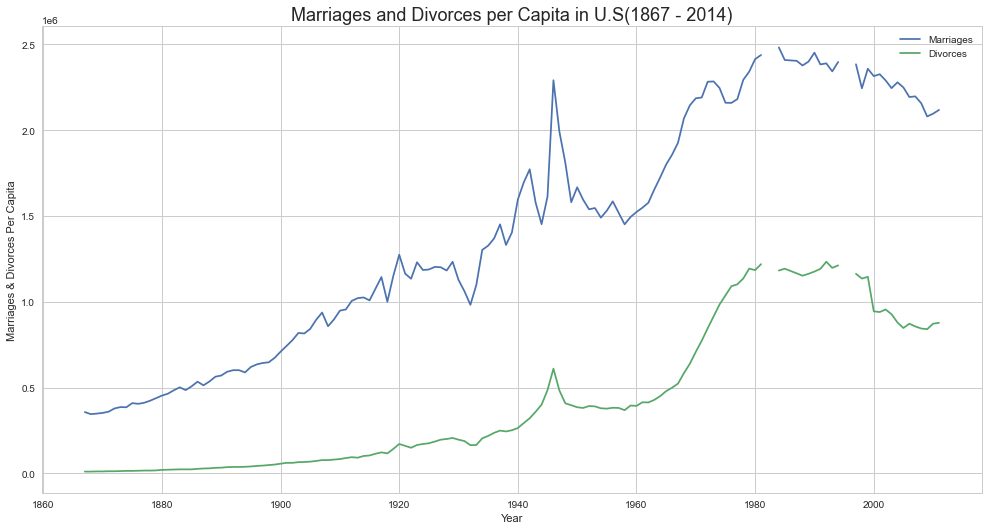

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

us_marriage_divorce_data = pd.read_csv(r"us-marriages-divorces-1867-2014.csv")
plt.style.use('seaborn-whitegrid')
plt.figure()
us_marriage_divorce_data.plot('Year',y=['Marriages','Divorces'],figsize=(15,8))
plt.ylabel('Marriages & Divorces Per Capita')
plt.title('Marriages and Divorces per Capita in U.S(1867 - 2014)', fontsize = 18)

plt.show()


#### Question 7
##### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

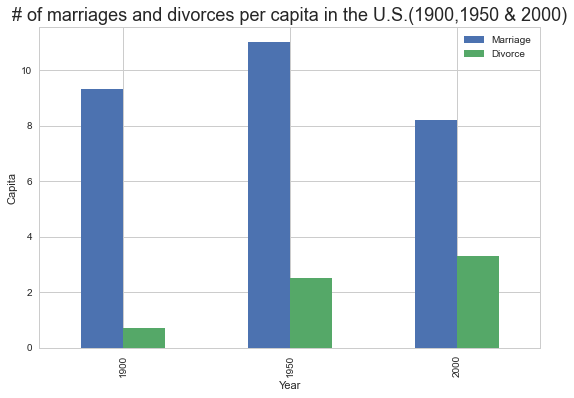

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

us_marriage_divorce_data = pd.read_csv(r"us-marriages-divorces-1867-2014.csv")
us_marriage_divorce_data = us_marriage_divorce_data[(us_marriage_divorce_data.Year == 1900) | (us_marriage_divorce_data.Year == 1950) | (us_marriage_divorce_data.Year == 2000)]
us_marriage_divorce_data = us_marriage_divorce_data.drop(columns = ['Marriages', 'Divorces', 'Population'])
us_marriage_divorce_data = us_marriage_divorce_data.set_index('Year')

# x = us_marriage_divorce_data['Year'].values
# Marriages = us_marriage_divorce_data['Marriages_per_1000'].values
# Divorces = us_marriage_divorce_data['Divorces_per_1000'].values
us_marriage_divorce_data.plot.bar()
# plt.bar(x,Marriages,10.2,label="Marriages")
# plt.bar(x,Divorces,10.2,label="Divorces")
plt.style.use('seaborn-whitegrid')

plt.xlabel("Year")
plt.ylabel("Capita")
plt.legend(['Marriage','Divorce'])
plt.title('# of marriages and divorces per capita in the U.S.(1900,1950 & 2000)', fontsize = 18)

plt.show()

#### Question 8
##### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!


Text(0.5, 1.0, 'Deadliest Hollywood actors')

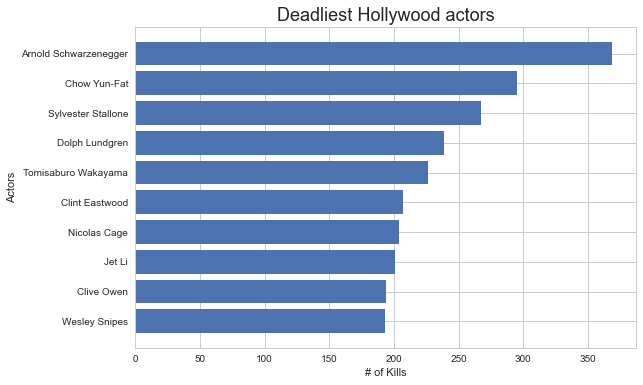

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

actorKills = pd.read_csv(r'actor_kill_counts.csv').sort_values(by=['Count'])
plt.figure()
plt.style.use('seaborn-whitegrid')
plt.barh(actorKills['Actor'], actorKills['Count'])
plt.xlabel('# of Kills')
plt.ylabel('Actors')
plt.title('Deadliest Hollywood actors', fontsize = 18)



#### Question 9
##### Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.


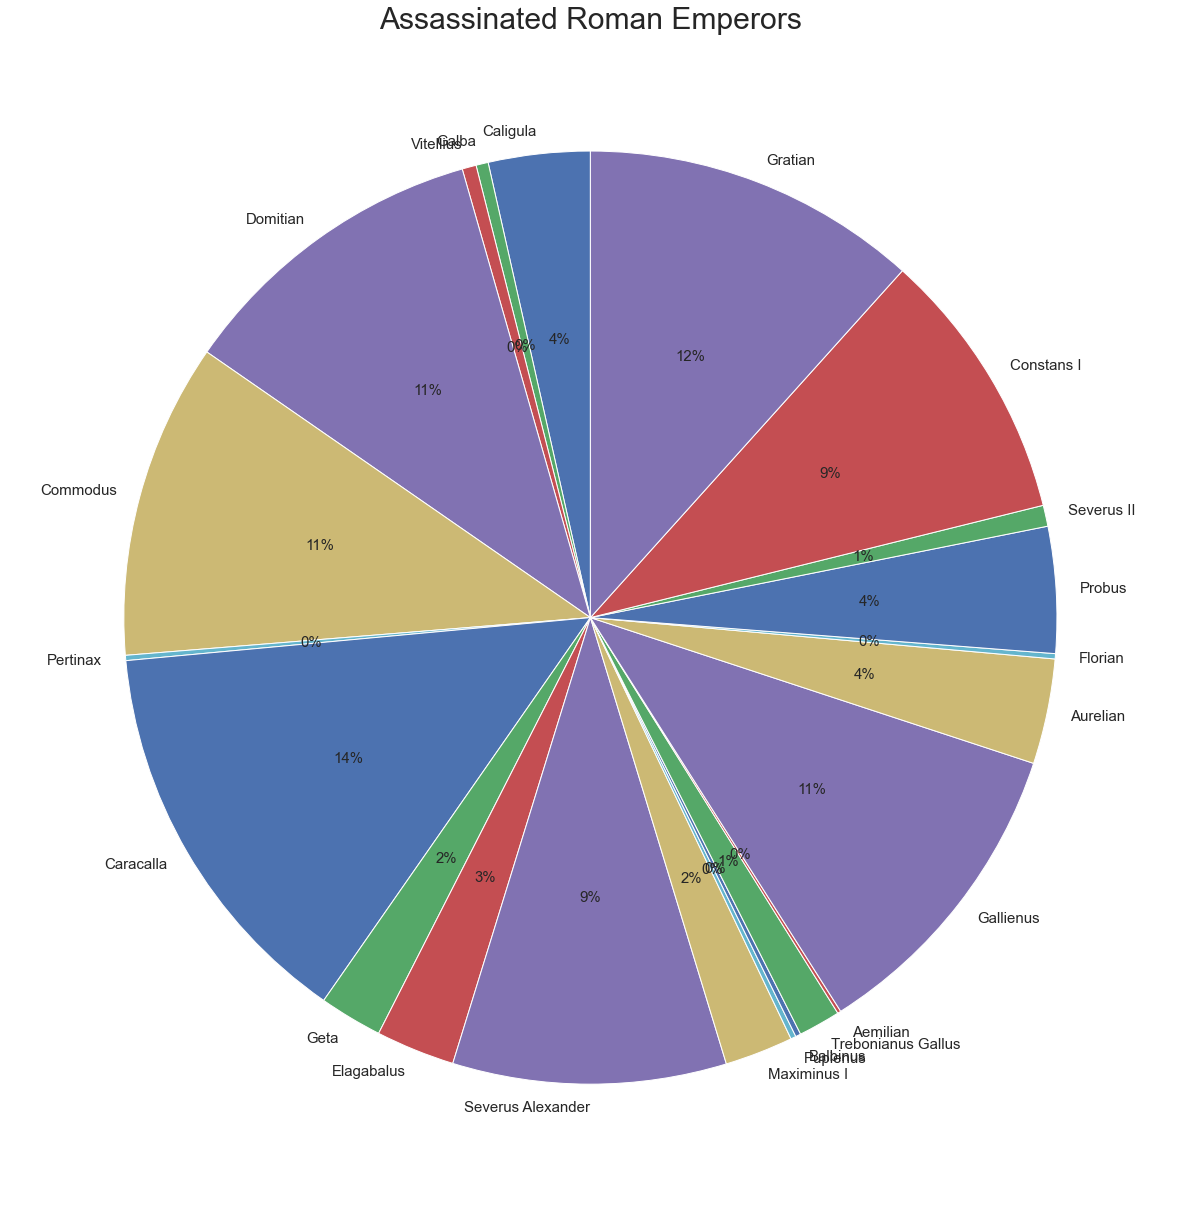

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

roman_data = pd.read_csv('roman-emperor-reigns.csv')
filterData = pd.DataFrame(roman_data.loc[(roman_data['Cause_of_Death']=='Assassinated')])


figure =plt.figure(figsize=(20,20))
plt.pie(filterData['Length_of_Reign'],labels = filterData['Emperor'],autopct="%1.0f%%",startangle = 90,labeldistance=1.05, textprops={'fontsize': 15},wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.style.use('seaborn-whitegrid')

plt.title('Assassinated Roman Emperors', fontsize = 30)
plt.show()



#### Question 10
##### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

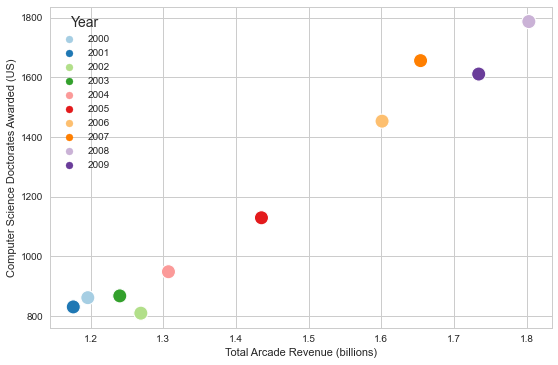

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

revenue_data = pd.read_csv(r'arcade-revenue-vs-cs-doctorates.csv')


sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)',palette="Paired",s=200,hue='Year', data = revenue_data)